# Import Libraries

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor

# Obtain Data

Read csv with salary data into pandas

In [467]:
salary_df = pd.read_csv('Data/salary.csv')
print('salary_df Shape: ', salary_df.shape)
salary_df.head()

salary_df Shape:  (576, 3)


,Player,Salary,Inflation Adjusted Salary
0,Stephen Curry,"$37,457,154","$38,320,489"
1,Russell Westbrook,"$35,665,000","$36,487,029"
2,Chris Paul,"$35,654,150","$36,475,929"
3,LeBron James,"$35,654,150","$36,475,929"
4,Kyle Lowry,"$32,700,000","$33,453,690"


Read csv with player stats into pandas

In [468]:
stats_df = pd.read_csv('Data/player_stats.csv')
print('stats_df Shape: ', stats_df.shape)
stats_df.head()

stats_df Shape:  (530, 29)


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,SG,25,OKC,31,2,588,56,157,0.357,...,0.923,5,43,48,20,17,6,14,53,165
1,Quincy Acy,PF,28,PHO,10,0,123,4,18,0.222,...,0.700,3,22,25,8,1,4,4,24,17
2,Jaylen Adams,PG,22,ATL,34,1,428,38,110,0.345,...,0.778,11,49,60,65,14,5,28,45,108
3,Steven Adams,C,25,OKC,80,80,2669,481,809,0.595,...,0.500,391,369,760,124,117,76,135,204,1108
4,Bam Adebayo,C,21,MIA,82,28,1913,280,486,0.576,...,0.735,165,432,597,184,71,65,121,203,729


# Scrub Data

Update player names to match across stats_df and salary_df for subsequent merger

In [469]:
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('.', ''))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ć', 'c'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ó', 'o'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('č', 'c'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('é', 'e'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Á', 'A'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('á', 'a'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ā', 'a'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ū', 'u'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Ž', 'Z'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ž', 'z'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('š', 's'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Š', 'S'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ý', 'y'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('ö', 'oe'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('è', 'e'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('İ', 'I'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('í', 'i'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace("' ", ' '))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace(' III', ''))
salary_df['Player'] = salary_df['Player'].apply(lambda x: x.replace(' III', ''))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace(' Jr', ''))
salary_df['Player'] = salary_df['Player'].apply(lambda x: x.replace(' Jr', ''))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('JJ Barea', 'Jose Juan Barea'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Vince Edwards', 'Vincent Edwards'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Maurice Harkless', 'Moe Harkless'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Walt Lemon', 'Walter Lemon'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Timothe Luwawu-Cabarrot', 'Timothe Luwawu'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Patty Mills', 'Patrick Mills'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Naz Mitrou-Long', 'Naz Long'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Svi Mykhailiuk', 'Sviatoslav Mykhailiuk'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Cameron Reynolds', 'Cam Reynolds'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Ish Smith', 'Ishmael Smith'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Ray Spalding', 'Raymond Spalding'))
stats_df['Player'] = stats_df['Player'].apply(lambda x: x.replace('Lou Williams', 'Louis Williams'))



Merge stats_df and salary df on player namaes

In [470]:
df = pd.merge(salary_df, stats_df, on='Player')
print('df Shape: ', df.shape)
df.head()

df Shape:  (530, 31)


,Player,Salary,Inflation Adjusted Salary,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,"$37,457,154","$38,320,489",PG,30,GSW,69,69,2331,632,...,0.916,45,324,369,361,92,25,192,166,1881
1,Russell Westbrook,"$35,665,000","$36,487,029",PG,30,OKC,73,73,2630,630,...,0.656,109,698,807,784,142,33,325,245,1675
2,Chris Paul,"$35,654,150","$36,475,929",PG,33,HOU,58,58,1857,302,...,0.862,36,229,265,473,114,18,152,146,906
3,LeBron James,"$35,654,150","$36,475,929",SF,34,LAL,55,55,1937,558,...,0.665,57,408,465,454,72,33,197,94,1505
4,Kyle Lowry,"$32,700,000","$33,453,690",PG,32,TOR,65,65,2213,304,...,0.830,41,271,312,564,91,31,182,166,926


View what scrubbing needed with df.info()

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 529
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Player                     530 non-null    object 
 1   Salary                     530 non-null    object 
 2   Inflation Adjusted Salary  530 non-null    object 
 3   Pos                        530 non-null    object 
 4   Age                        530 non-null    int64  
 5   Tm                         530 non-null    object 
 6   G                          530 non-null    int64  
 7   GS                         530 non-null    int64  
 8   MP                         530 non-null    int64  
 9   FG                         530 non-null    int64  
 10  FGA                        530 non-null    int64  
 11  FG%                        526 non-null    float64
 12  3P                         530 non-null    int64  
 13  3PA                        530 non-null    int64  

Drop columns not useful for modeling

In [472]:
df.drop(columns=['Player', 'Inflation Adjusted Salary', 'Tm', 'TRB'], inplace=True)
print('df Shape: ', df.shape)
df.head()

df Shape:  (530, 27)


,Salary,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,"$37,457,154",PG,30,69,69,2331,632,1340,0.472,354,...,287,0.916,45,324,361,92,25,192,166,1881
1,"$35,665,000",PG,30,73,73,2630,630,1473,0.428,119,...,451,0.656,109,698,784,142,33,325,245,1675
2,"$35,654,150",PG,33,58,58,1857,302,720,0.419,127,...,203,0.862,36,229,473,114,18,152,146,906
3,"$35,654,150",SF,34,55,55,1937,558,1095,0.510,111,...,418,0.665,57,408,454,72,33,197,94,1505
4,"$32,700,000",PG,32,65,65,2213,304,739,0.411,157,...,194,0.830,41,271,564,91,31,182,166,926


Update salary to int data type

In [473]:
df['Salary'] = df['Salary'].apply(lambda x: int(x.replace('$', '').replace(',', '')))
df.head()

,Salary,Pos,Age,G,GS,MP,FG,FGA,FG%,3P,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,37457154,PG,30,69,69,2331,632,1340,0.472,354,...,287,0.916,45,324,361,92,25,192,166,1881
1,35665000,PG,30,73,73,2630,630,1473,0.428,119,...,451,0.656,109,698,784,142,33,325,245,1675
2,35654150,PG,33,58,58,1857,302,720,0.419,127,...,203,0.862,36,229,473,114,18,152,146,906
3,35654150,SF,34,55,55,1937,558,1095,0.510,111,...,418,0.665,57,408,454,72,33,197,94,1505
4,32700000,PG,32,65,65,2213,304,739,0.411,157,...,194,0.830,41,271,564,91,31,182,166,926


Update position (Pos) for multipositional nba players to their predominant position

In [474]:
df['Pos'] = df['Pos'].apply(lambda x: x.split('-')[0])
df['Pos'].value_counts()

SG    134
PF    107
PG    107
C      95
SF     87
Name: Pos, dtype: int64

Create dummy variable for position feature

In [475]:
df = pd.get_dummies(df, columns=['Pos'], drop_first=True, prefix_sep=': ')
df.head()

,Salary,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,AST,STL,BLK,TOV,PF,PTS,Pos: PF,Pos: PG,Pos: SF,Pos: SG
0,37457154,30,69,69,2331,632,1340,0.472,354,810,...,361,92,25,192,166,1881,0,1,0,0
1,35665000,30,73,73,2630,630,1473,0.428,119,411,...,784,142,33,325,245,1675,0,1,0,0
2,35654150,33,58,58,1857,302,720,0.419,127,355,...,473,114,18,152,146,906,0,1,0,0
3,35654150,34,55,55,1937,558,1095,0.510,111,327,...,454,72,33,197,94,1505,0,0,1,0
4,32700000,32,65,65,2213,304,739,0.411,157,453,...,564,91,31,182,166,926,0,1,0,0


Calculate True Shooting Percentage interaction and drop other shooting features

In [476]:
df['TS%'] = df['PTS'] / (df['FGA'] + df['FTA']/2) / 2
df.drop(columns=['FG', 'FGA', 'FG%', '3P', '3PA', '3P%','2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%'], 
        inplace=True)
df.head()

,Salary,Age,G,GS,MP,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Pos: PF,Pos: PG,Pos: SF,Pos: SG,TS%
0,37457154,30,69,69,2331,45,324,361,92,25,192,166,1881,0,1,0,0,0.633974
1,35665000,30,73,73,2630,109,698,784,142,33,325,245,1675,0,1,0,0,0.493082
2,35654150,33,58,58,1857,36,229,473,114,18,152,146,906,0,1,0,0,0.551430
3,35654150,34,55,55,1937,57,408,454,72,33,197,94,1505,0,0,1,0,0.577071
4,32700000,32,65,65,2213,41,271,564,91,31,182,166,926,0,1,0,0,0.553828


Replace missing TS% values with 0 corresponding to players lack of a field goal attempt

In [477]:
df.fillna(value=0, inplace=True)
df.head()

,Salary,Age,G,GS,MP,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Pos: PF,Pos: PG,Pos: SF,Pos: SG,TS%
0,37457154,30,69,69,2331,45,324,361,92,25,192,166,1881,0,1,0,0,0.633974
1,35665000,30,73,73,2630,109,698,784,142,33,325,245,1675,0,1,0,0,0.493082
2,35654150,33,58,58,1857,36,229,473,114,18,152,146,906,0,1,0,0,0.551430
3,35654150,34,55,55,1937,57,408,454,72,33,197,94,1505,0,0,1,0,0.577071
4,32700000,32,65,65,2213,41,271,564,91,31,182,166,926,0,1,0,0,0.553828


Update in game statistics from season totals to per minute

In [478]:
per_minute_list = ['PTS', 'PF', 'TOV', 'BLK', 'STL', 'AST', 'DRB', 'ORB']
for var in per_minute_list:
    df[f'{var}/M'] = df[var] / df['MP']
df.drop(columns=per_minute_list, inplace=True)
df.head()

,Salary,Age,G,GS,MP,Pos: PF,Pos: PG,Pos: SF,Pos: SG,TS%,PTS/M,PF/M,TOV/M,BLK/M,STL/M,AST/M,DRB/M,ORB/M
0,37457154,30,69,69,2331,0,1,0,0,0.633974,0.806950,0.071214,0.082368,0.010725,0.039468,0.154869,0.138996,0.019305
1,35665000,30,73,73,2630,0,1,0,0,0.493082,0.636882,0.093156,0.123574,0.012548,0.053992,0.298099,0.265399,0.041445
2,35654150,33,58,58,1857,0,1,0,0,0.551430,0.487884,0.078621,0.081852,0.009693,0.061389,0.254712,0.123317,0.019386
3,35654150,34,55,55,1937,0,0,1,0,0.577071,0.776975,0.048529,0.101704,0.017037,0.037171,0.234383,0.210635,0.029427
4,32700000,32,65,65,2213,0,1,0,0,0.553828,0.418437,0.075011,0.082241,0.014008,0.041121,0.254858,0.122458,0.018527


Calculate Minutes/Game feature and drop Minutes Played

In [479]:
df['M/G'] = df['MP']/df['G']
df.drop(columns='MP', inplace=True)
df.head()

,Salary,Age,G,GS,Pos: PF,Pos: PG,Pos: SF,Pos: SG,TS%,PTS/M,PF/M,TOV/M,BLK/M,STL/M,AST/M,DRB/M,ORB/M,M/G
0,37457154,30,69,69,0,1,0,0,0.633974,0.806950,0.071214,0.082368,0.010725,0.039468,0.154869,0.138996,0.019305,33.782609
1,35665000,30,73,73,0,1,0,0,0.493082,0.636882,0.093156,0.123574,0.012548,0.053992,0.298099,0.265399,0.041445,36.027397
2,35654150,33,58,58,0,1,0,0,0.551430,0.487884,0.078621,0.081852,0.009693,0.061389,0.254712,0.123317,0.019386,32.017241
3,35654150,34,55,55,0,0,1,0,0.577071,0.776975,0.048529,0.101704,0.017037,0.037171,0.234383,0.210635,0.029427,35.218182
4,32700000,32,65,65,0,1,0,0,0.553828,0.418437,0.075011,0.082241,0.014008,0.041121,0.254858,0.122458,0.018527,34.046154


Confirm data now scrubbed with df.info()

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 529
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Salary   530 non-null    int64  
 1   Age      530 non-null    int64  
 2   G        530 non-null    int64  
 3   GS       530 non-null    int64  
 4   Pos: PF  530 non-null    uint8  
 5   Pos: PG  530 non-null    uint8  
 6   Pos: SF  530 non-null    uint8  
 7   Pos: SG  530 non-null    uint8  
 8   TS%      530 non-null    float64
 9   PTS/M    530 non-null    float64
 10  PF/M     530 non-null    float64
 11  TOV/M    530 non-null    float64
 12  BLK/M    530 non-null    float64
 13  STL/M    530 non-null    float64
 14  AST/M    530 non-null    float64
 15  DRB/M    530 non-null    float64
 16  ORB/M    530 non-null    float64
 17  M/G      530 non-null    float64
dtypes: float64(10), int64(4), uint8(4)
memory usage: 64.2 KB


# Explore Data

Calculate descriptive statistics for each feature

In [481]:
df.describe().iloc[:,0:10]

,Salary,Age,G,GS,Pos: PF,Pos: PG,Pos: SF,Pos: SG,TS%,PTS/M
count,5.300000e+02,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,6.518263e+06,25.896226,49.247170,23.207547,0.201887,0.201887,0.164151,0.252830,0.523809,0.412901
std,7.868825e+06,4.190477,26.048763,27.988087,0.401787,0.401787,0.370762,0.435045,0.114544,0.161563
min,4.737000e+04,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.378242e+06,23.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.498120,0.323163
50%,2.756387e+06,25.000000,56.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.539499,0.398168
75%,9.520185e+06,29.000000,73.000000,43.750000,0.000000,0.000000,0.000000,1.000000,0.575709,0.495295
max,3.745715e+07,42.000000,82.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000


In [482]:
df.describe().iloc[:,11:]

,TOV/M,BLK/M,STL/M,AST/M,DRB/M,ORB/M,M/G
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000
mean,0.052540,0.020024,0.031503,0.091083,0.141923,0.046498,19.359455
std,0.028753,0.020825,0.021052,0.058947,0.074073,0.056006,9.112335
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667
25%,0.035316,0.006711,0.021249,0.049845,0.094583,0.018018,12.262500
50%,0.048714,0.014380,0.029262,0.075525,0.127713,0.030515,19.175301
75%,0.064918,0.025641,0.038296,0.124548,0.175964,0.067040,27.176904
max,0.250000,0.166667,0.250000,0.333333,0.800000,1.000000,36.926829


Plot distribution for each variable

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

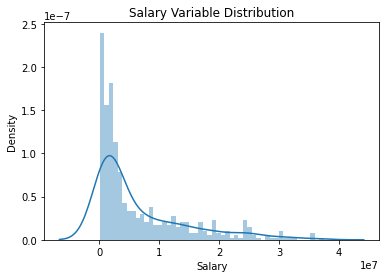

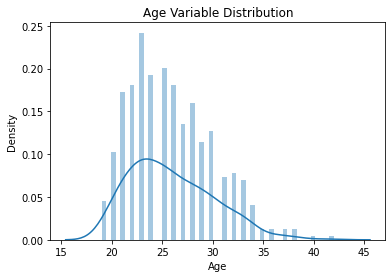

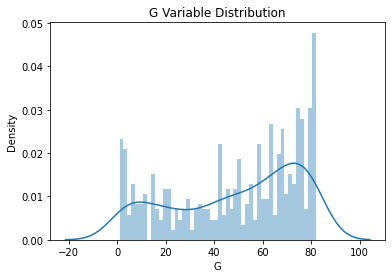

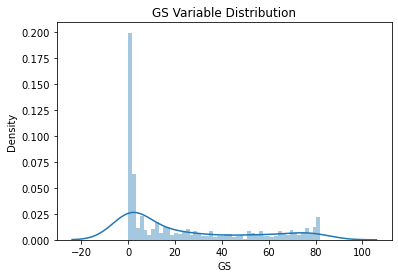

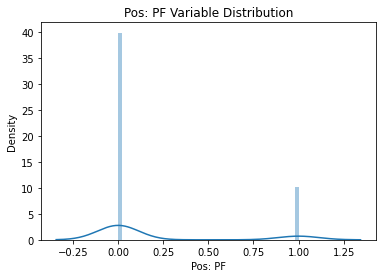

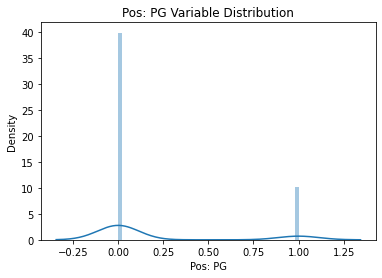

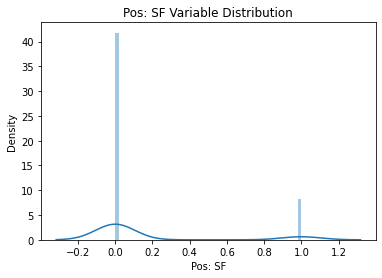

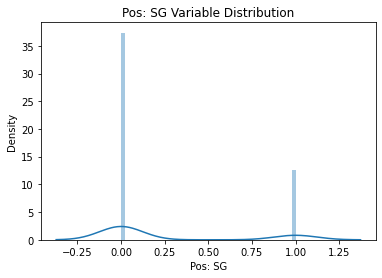

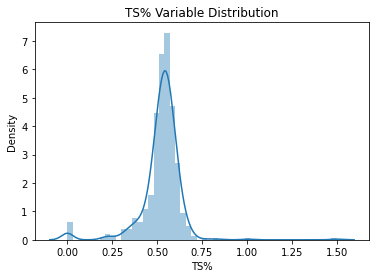

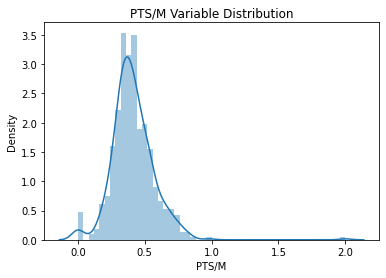

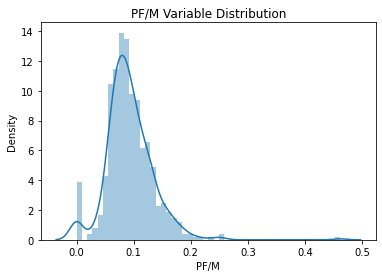

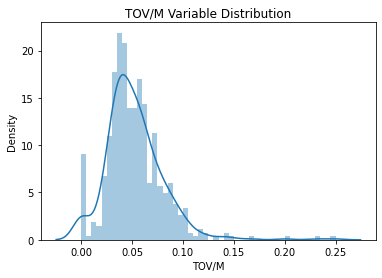

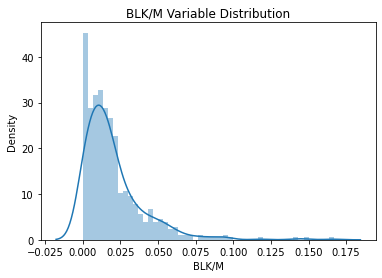

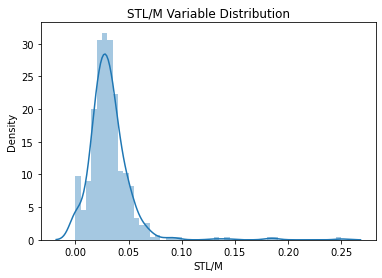

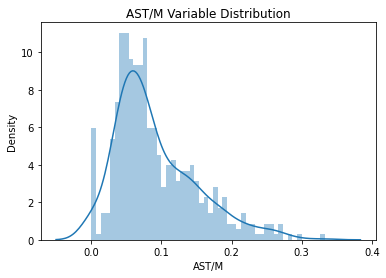

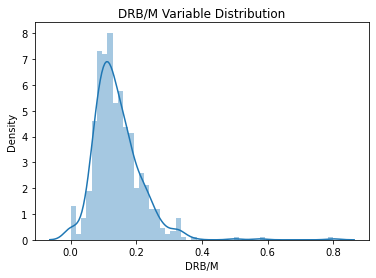

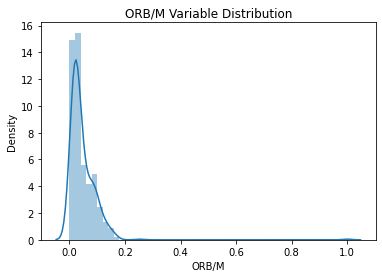

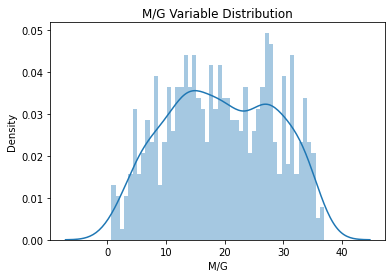

In [483]:
for feat in df.columns:
    fig, ax = plt.subplots()
    sns.distplot(df[feat], bins=50)
    ax.set_title(f'{feat} Variable Distribution')

Plot relationship between each feature and the Salary dependent varaible

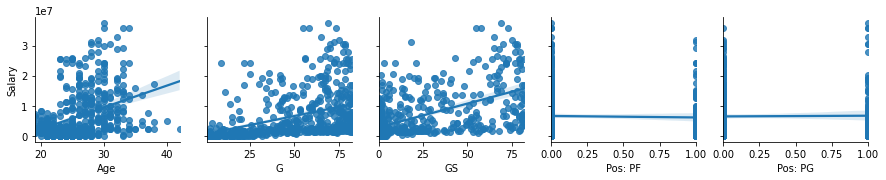

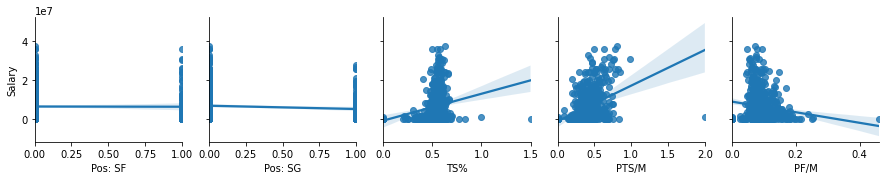

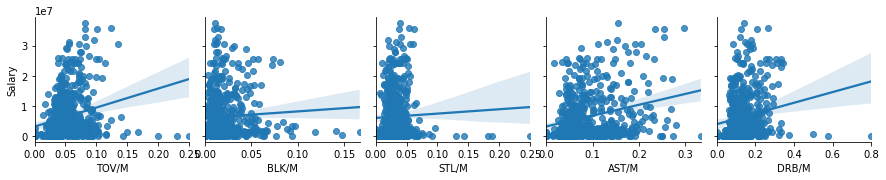

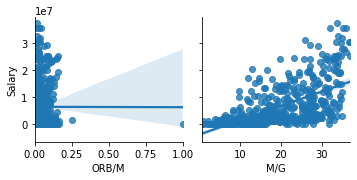

In [484]:
for num in range(1,len(df.columns), 5):
    pairplot = sns.pairplot(df, x_vars=df.columns[num:num+5], y_vars='Salary', kind='reg')

Calculate feature vif to confirm no features need to be dropped

In [486]:
vif_df = add_constant(df.drop(columns=['Salary']))
vif_output = []
for num in range(0, len(vif_df.columns)):
    vif_output.append([vif_df.columns[num], variance_inflation_factor(vif_df.values, num)])
vif_output_df = pd.DataFrame(vif_output, columns=['Column', 'VIF'])
vif_output_df.sort_values(by='VIF', ascending=False, inplace=True)
vif_output_df

,Column,VIF
0,const,110.951718
5,Pos: PG,4.681398
17,M/G,4.350027
7,Pos: SG,4.141074
3,GS,3.199438
6,Pos: SF,2.785248
14,AST/M,2.484036
2,G,2.328962
8,TS%,2.217315
4,Pos: PF,2.176624


# Model Data

Create x and y variables

In [487]:
x = df.drop(columns=['Salary'])
y = df['Salary']

Perform train test split on data

In [488]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=74, test_size=.2)

Standard scale data

In [489]:
ss = StandardScaler()
ss.fit(x_train)
x_train = pd.DataFrame(ss.transform(x_train), columns = x.columns)
x_test = pd.DataFrame(ss.transform(x_test), columns = x.columns)
x_train.head()

,Age,G,GS,Pos: PF,Pos: PG,Pos: SF,Pos: SG,TS%,PTS/M,PF/M,TOV/M,BLK/M,STL/M,AST/M,DRB/M,ORB/M,M/G
0,0.263906,-0.372355,0.083146,-0.482243,2.042237,-0.440870,-0.613696,-0.356087,-0.291335,-0.232097,-0.404991,-0.806870,-0.158845,0.088712,-0.988176,-0.559227,-0.060538
1,-0.470642,0.716981,-0.733407,-0.482243,-0.489659,-0.440870,-0.613696,0.021353,-0.759835,0.164649,0.019247,2.034583,-0.300916,0.088364,0.279584,0.378014,-0.853251
2,0.019057,1.017487,-0.307380,-0.482243,-0.489659,-0.440870,1.629470,-0.198163,-0.629959,0.177232,-0.649625,-0.411662,-0.400315,-0.148704,-0.975409,-0.580229,0.789733
3,0.753604,-1.611944,-0.804412,-0.482243,-0.489659,-0.440870,-0.613696,0.572227,0.504517,2.770735,-0.328868,0.546901,-0.960275,-0.810101,-0.032634,1.186410,-0.427511
4,0.998453,0.979924,1.716252,-0.482243,-0.489659,2.268243,-0.613696,0.457997,-0.676514,-0.800594,-0.102451,-0.094282,-0.085425,0.230964,-0.088379,-0.282866,1.301529


Build and evaluate Dummy Regressor model

In [490]:
dr = DummyRegressor()
dr.fit(x_train, y_train)
y_train_pred_dr = dr.predict(x_train)
y_test_pred_dr = dr.predict(x_test)
print('Dummy Regressor')
print('Train RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_dr)))
print('Train MAE', mean_absolute_error(y_train, y_train_pred_dr))
print('Train R Squared', r2_score(y_train, y_train_pred_dr))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_dr)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_dr))
print('Test R Squared', r2_score(y_test, y_test_pred_dr))

Dummy Regressor
Train RMSE 8302046.027875043
Train MAE 6429768.322022962
Train R Squared 0.0
Test RMSE 5777924.226369044
Test MAE 5030780.184140263
Test R Squared -0.010964059917444091


Build and evaluate Linear Regression model

In [505]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)
print('Dummy Regressor')
print('Train RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print('Train MAE', mean_absolute_error(y_train, y_train_pred_lr))
print('Train R Squared', r2_score(y_train, y_train_pred_lr))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_lr))
print('Test R Squared', r2_score(y_test, y_test_pred_lr))

Dummy Regressor
Train RMSE 5459838.593295886
Train MAE 4191349.90988704
Train R Squared 0.567496790707566
Test RMSE 4840571.178169781
Test MAE 3795950.762414517
Test R Squared 0.2904463252010153


In [523]:
ab = AdaBoostRegressor(learning_rate=1)
ab.fit(x_train, y_train)
y_train_pred_ab = ab.predict(x_train)
y_test_pred_ab = ab.predict(x_test)
print('Dummy Regressor')
print('Train RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred_ab)))
print('Train MAE', mean_absolute_error(y_train, y_train_pred_ab))
print('Train R Squared', r2_score(y_train, y_train_pred_ab))
print('Test RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred_ab)))
print('Test MAE', mean_absolute_error(y_test, y_test_pred_ab))
print('Test R Squared', r2_score(y_test, y_test_pred_ab))

Dummy Regressor
Train RMSE 4523180.854893578
Train MAE 4044100.03988768
Train R Squared 0.7031632744624254
Test RMSE 4593734.85673137
Test MAE 3969984.2055873093
Test R Squared 0.36096612294110897
